In [1]:
import warnings

import numpy as np
import pandas as pd

import matplotlib
import skimage

import sys
import os

warnings.filterwarnings('ignore')

In [1]:
import cv2
cv2.__version__

'4.3.0'

In [3]:
ROOT_DIR = os.path.abspath('./images/revised_image/')

object_path = os.path.join(ROOT_DIR, 'shielding')

orgin_path = os.path.join(object_path, 'original_gt')
seg_path = os.path.join(object_path, 'segmentation_gt')

print("base orginal path:", orgin_path)
print("base revised path:", seg_path)

base orginal path: C:\Users\daumsoft\Jupyter Notebook\daumsoft\LH Digital Twin Develop\딥러닝_통합_API\Dpredict\images\revised_image\shielding\original_gt
base revised path: C:\Users\daumsoft\Jupyter Notebook\daumsoft\LH Digital Twin Develop\딥러닝_통합_API\Dpredict\images\revised_image\shielding\segmentation_gt


In [4]:
img_list = os.listdir(orgin_path)

In [5]:
%%time
import cv2

from PIL import Image

for f in img_list:
    img = Image.open(os.path.join(orgin_path, f)).convert('L')
    copy_img = img.copy()
    input_arr = np.array(copy_img).reshape((img.size[1], img.size[0]))
    
    _, input_arr = cv2.threshold(input_arr, 127, 255, cv2.THRESH_BINARY)
    cv2.floodFill(input_arr, None, (0,img.size[1]-1), 255)       
    
    invert_img = Image.fromarray(input_arr)

    save_path = os.path.join(seg_path, f)
    invert_img.save(save_path)

Wall time: 1.09 s


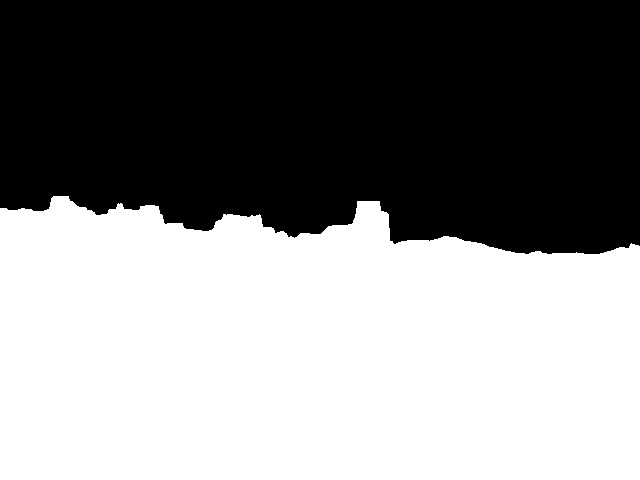

In [6]:
Image.fromarray(input_arr)